In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cat-vs-rabbit:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1496720%2F2474164%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240715%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240715T102342Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0deaa77f91a87b079d590dc8a64fe7dd43bf3b9676ed129349572fea1820e0b10e8d5af0cf8aa0918b5d77d49b5d5cf0a081f9716fcc9f26ccaecc3ee0f7fa1a2b1c94bc79ff57bb9607ff360d60714d83ee5fd54e24f14e916a79483b57bb43525ed163d24b061fc6478d14c83f371e33fc1657b6b32df2a8a7ddea877f7c742d68d92506f3963361d4c879b7d4fd387e0646e2df4f128291dc49a96ae009e67b1f10d69234f169b88a67c3bf3f63dc417cd0f6639d0158f14fdf2940e0ca327a48844cd62df11a125935a2d7c0b083aff56ec36bdc7ad211f48b8aa6e56f8eb469e9accfc04cc3572faf7ec9e78a1b92c8705bb8156258d6573df80e237022'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-vs-rabbit/test-images/rabbit/rabbit_test.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images-4.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images-2.jpeg
/kaggle/input/cat-vs-rabbit/test-images/rabbit/images-3.jpeg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.210.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.239.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.234.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.236.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.238.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.208.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.233.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.235.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.237.jpg
/kaggle/input/cat-vs-rabbit/test-images/cat/cat.209.jpg
/kaggle/input/cat-vs-rabbit/train-cat-rabbit/rabbit/rabbit.589.jpg
/kaggle/input/cat-vs-rabbit/train-cat-rabbit/rabbit/rabbit.5.jpg
/k

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models ,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-07-15 09:52:10.331778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 09:52:10.331866: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 09:52:10.495354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from PIL import Image

# فتح الصورة
image = Image.open('/kaggle/input/cat-vs-rabbit/train-cat-rabbit/cat/cat.1.jpg')

# الحصول على حجم الصورة
width, height = image.size

print(f"عرض الصورة: {width} بكسل")
print(f"طول الصورة: {height} بكسل")

عرض الصورة: 300 بكسل
طول الصورة: 300 بكسل


In [ ]:
from PIL import Image

# فتح الصورة
image = Image.open('/kaggle/input/cat-vs-rabbit/train-cat-rabbit/cat/cat.1.jpg')

# الحصول على صيغة الصورة
mode = image.mode

print(f"صيغة الصورة: {mode}")

# تحديد عدد القنوات بناءً على صيغة الصورة
if mode == 'RGB':
    channels = 3
elif mode == 'L':  # صور التدرج الرمادي
    channels = 1
elif mode == 'RGBA':
    channels = 4
else:
    channels = None  # صيغة غير معروفة

print(f"عدد القنوات في الصورة: {channels}")


صيغة الصورة: RGB
عدد القنوات في الصورة: 3


# توضيح:
image.mode يعيد صيغة الصورة.
إذا كانت صيغة الصورة RGB، فهذا يعني أن الصورة تحتوي على 3 قنوات (الأحمر، الأخضر، الأزرق).
إذا كانت صيغة الصورة L، فهذا يعني أن الصورة هي صورة تدرج رمادي وتحتوي على قناة واحدة.
إذا كانت صيغة الصورة RGBA، فهذا يعني أن الصورة تحتوي على 4 قنوات (الأحمر، الأخضر، الأزرق، وألفا للشفافية).

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد ImageDataGenerator لمعالجة الصور
train_datagen = ImageDataGenerator(
    rescale=1./255,  # إعادة قياس الصور لتكون القيم بين 0 و 1
    horizontal_flip=True,  # قلب الصور أفقيًا بشكل عشوائي
    rotation_range=10  # تدوير الصور بزاوية تصل إلى 10 درجات بشكل عشوائي
)

# إعداد مولد البيانات من المجلد
train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/cat-vs-rabbit/train-cat-rabbit",  # المسار إلى مجلد التدريب
    target_size=(300, 300),  # تعيين حجم الصور إلى 300x300 بكسل
    batch_size=32,  # حجم الدفعة
    class_mode='sparse'  # وضع التصنيف
)

# طباعة تفاصيل الصور التي يتم تحميلها
print(f"حجم الصور المعالجة: 300x300 بكسل")
print(f"عدد القنوات: 3")

Found 1600 images belonging to 2 classes.
حجم الصور المعالجة: 300x300 بكسل
عدد القنوات: 3


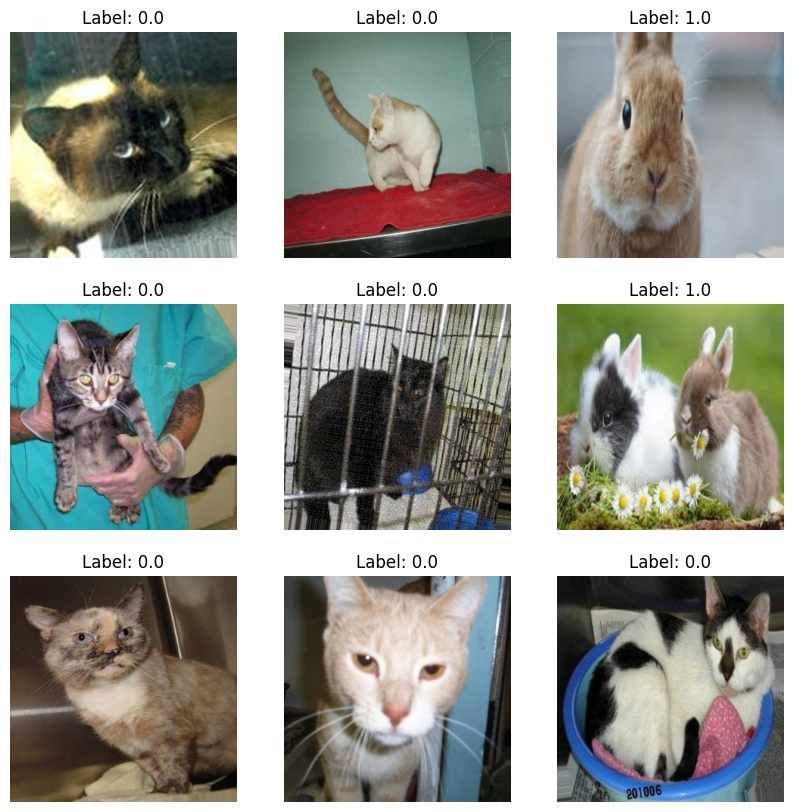

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# الحصول على دفعة واحدة من الصور والتسميات
images, labels = next(train_generator)

# عرض أول 9 صور من الدفعة
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد ImageDataGenerator لمعالجة الصور
vail_datagen = ImageDataGenerator(
    rescale=1./255,  # إعادة قياس الصور لتكون القيم بين 0 و 1
    horizontal_flip=True,  # قلب الصور أفقيًا بشكل عشوائي
    rotation_range=10  # تدوير الصور بزاوية تصل إلى 10 درجات بشكل عشوائي
)

# إعداد مولد البيانات من المجلد
vail_generator = vail_datagen.flow_from_directory(
    "/kaggle/input/cat-vs-rabbit/val-cat-rabbit",  # المسار إلى مجلد التحقق
    target_size=(300, 300),  # تعيين حجم الصور إلى 300x300 بكسل
    batch_size=32,  # حجم الدفعة
    class_mode='sparse'  # وضع التصنيف
)

# طباعة تفاصيل الصور التي يتم تحميلها
print(f"حجم الصور المعالجة: 300x300 بكسل")
print(f"عدد القنوات: 3")


Found 414 images belonging to 2 classes.
حجم الصور المعالجة: 300x300 بكسل
عدد القنوات: 3


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد ImageDataGenerator لمعالجة الصور
test_datagen = ImageDataGenerator(
    rescale=1./255,  # إعادة قياس الصور لتكون القيم بين 0 و 1
    horizontal_flip=True,  # قلب الصور أفقيًا بشكل عشوائي
    rotation_range=10  # تدوير الصور بزاوية تصل إلى 10 درجات بشكل عشوائي
)

# إعداد مولد البيانات من المجلد
test_generator = train_datagen.flow_from_directory(
    "/kaggle/input/cat-vs-rabbit/test-images",  # المسار إلى مجلد التدريب
    target_size=(300, 300),  # تعيين حجم الصور إلى 300x300 بكسل
    batch_size=32,  # حجم الدفعة
    class_mode='sparse'  # وضع التصنيف
)

# طباعة تفاصيل الصور التي يتم تحميلها
print(f"حجم الصور المعالجة: 300x300 بكسل")
print(f"عدد القنوات: 3")

Found 15 images belonging to 2 classes.
حجم الصور المعالجة: 300x300 بكسل
عدد القنوات: 3


In [ ]:
from tensorflow.keras import models, layers, Input

# إعداد المعلمات الأساسية
IMAGE_SIZE = 300
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

# بناء النموذج
model = models.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# عرض ملخص النموذج
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=22,
    batch_size=32,
    validation_data=vail_generator,
    validation_steps=6,
    verbose=1,
    epochs=100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/22 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5078 - loss: 0.7040 

I0000 00:00:1721037167.493520     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 955ms/step - accuracy: 0.5109 - loss: 0.7031 - val_accuracy: 0.5365 - val_loss: 0.6888
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 750ms/step - accuracy: 0.5527 - loss: 0.6803 - val_accuracy: 0.6198 - val_loss: 0.6373
Epoch 3/100
 6/22 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.7033 - loss: 0.6162

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.6956 - loss: 0.6085 - val_accuracy: 0.6000 - val_loss: 0.6943
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 815ms/step - accuracy: 0.6678 - loss: 0.6197 - val_accuracy: 0.7083 - val_loss: 0.6245
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 703ms/step - accuracy: 0.7099 - loss: 0.5854 - val_accuracy: 0.7865 - val_loss: 0.5604
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6738 - loss: 0.5790 - val_accuracy: 0.7333 - val_loss: 0.5133
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 830ms/step - accuracy: 0.7589 - loss: 0.5097 - val_accuracy: 0.7240 - val_loss: 0.5472
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 683ms/step - accuracy: 0.7181 - loss: 0.5422 - val_accuracy: 0.7708 - val_loss: 0.5548
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8025 - loss: 0.4999 - val_accuracy: 0.8000 - val_loss: 0.4512
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 786ms/step - accuracy: 0.7723 - loss: 0.4578 - val_accuracy: 0.

<Axes: >

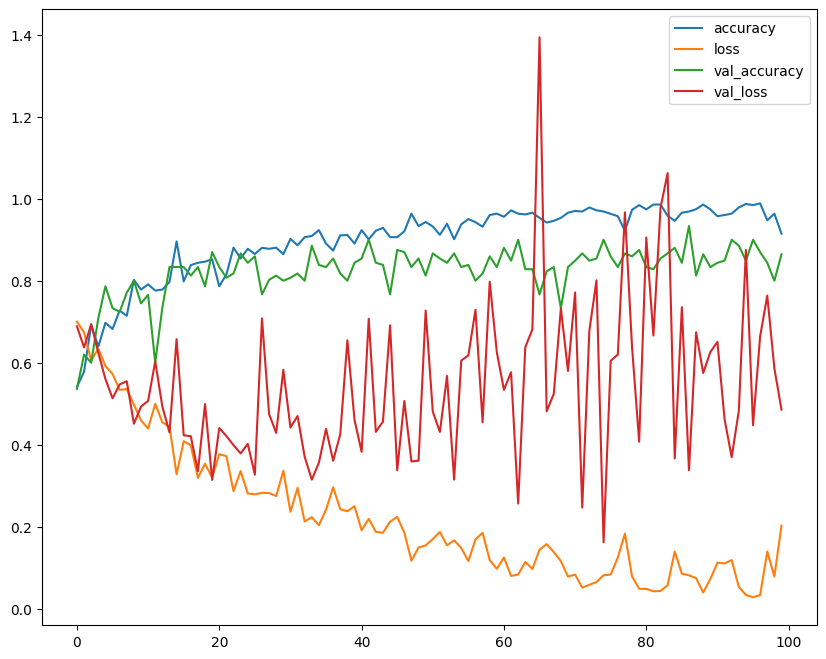

In [ ]:
df=pd.DataFrame(history.history)
df.plot(figsize=(10,8))

In [ ]:
scores = model.evaluate(test_generator)
print('Test Loss:', scores)
print('Test Accuracy:', scores)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8000 - loss: 0.8146
Test Loss: [0.8145789504051208, 0.800000011920929]
Test Accuracy: [0.8145789504051208, 0.800000011920929]


In [ ]:
scores

[0.8145789504051208, 0.800000011920929]

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['cat', 'rabbit']

first image to predict
actual label: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted label: cat


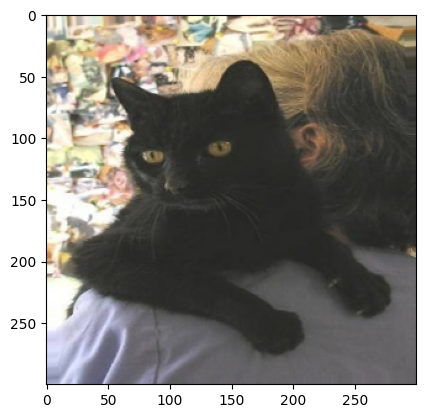

In [ ]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(min(14, len(images))):  # تحقق من أن عدد الصور لا يتجاوز 9
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        # قم بالتنبؤ بالصورة
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        # قم بإعداد النص المعلوماتي
        text = f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%"

        # إضافة النص إلى الصورة
        plt.text(0, -20, text, color='white', fontsize=10, ha='left', backgroundcolor='black')

    # اكتمل العرض للصور، فقط استمر إذا كانت هناك مزيد من الصور للعرض
    break

plt.tight_layout()  # ضبط التخطيط
plt.show()  # عرض الشكل


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
